# Data 601 - An Investigation into Sleep Behaviours
## Group 15
Josh Brauner, Raahim Salman, Ze Yu


## Introduction

Sleep is a critical part of our lives, occupying about one-third of our lifespan. It is critical to physical health, mental well-being, cognitive performance, and safety. Benefits of sleep also are stacked with a reduction in risks of Sleep Behaviour Disorder.
The ISRUC-Sleep dataset is a resource for researchers interested in the field of sleep studies. This polysomnographic (PSG) dataset was compiled to facilitate a wide range of investigations into sleep patterns, disorders, and the effects of medication on sleep. Comprising data from 100 human adults, including both healthy subjects and those diagnosed with sleep disorders, the dataset is structured to support various research objectives and methodologies.

### Motivations for Researching Sleep

Researching sleep is crucial for several reasons, reflecting the central role of sleep in human health and well-being:

-   **Understanding Sleep Disorders**: With a wide prevalence of sleep disorders across the global population, understanding the nuances of these conditions is vital for developing effective treatments. The ISRUC-Sleep dataset allows researchers to study the specific patterns and anomalies associated with different disorders.

-   **Impact on Health**: Sleep has profound effects on physical health, mental health, and cognitive function. Research can uncover how variations in sleep patterns affect these areas, leading to improved guidelines for healthy sleep and interventions for sleep-related health issues.

In summary, the ISRUC-Sleep dataset is a foundational tool for advancing our understanding of sleep and its complex interplay with human health. It enables researchers to explore questions related to sleep physiology, disorders, treatment effects, and beyond, with the ultimate goal of enhancing sleep quality and health outcomes for individuals around the world.

## Guiding Questions

- How do age and gender affect sleep hours? 

Currently, there are recommendations (citation) for the amount of sleep someone should be getting based on their age group. Answering this question will allow a comparison between the recommended amount and the actual amount that people sleep and see if there is a specific age group or gender that is more likely to have their sleep hours fall outside the recommended rangof sleep? 

- What other factors impact sleep quality? 

This will be a comparison of the various health and in the database to a person’s quality of sleep. Quality of sleep will be assessed by comparing different proportions of sleep stages as well as total sleep time against current recommendations.

- How does health status (such as BMI) impact sleep hours and resting heart rate? 

- How do sleep disorders impact quality and hours of sleep?

## Dataset

### Dataset Overview

A polysomnographic (PSG) dataset named ISRUC-Sleep that was created aiming to help sleep researchers in their studies. The data were obtained from human adults, including healthy subjects, and subjects with sleep disorders under the effect of sleep medication. The dataset is organized into three main groups, each tailored to address different research needs:

1.  **General Population Data**: It includes one recording session per subject across 100 subjects, offering a broad overview of sleep characteristics in a diverse population.The PSG recordings, associated with each subject, were visually scored by two human experts. The PSG recordings include electrophysiological signals, pneumological signals, and another contextual information of the subjects.

2.  **Healthy Subjects Data**: This subset focuses on 10 healthy individuals, allowing for detailed comparisons between healthy sleep patterns and those affected by sleep disorders.

3.  **Sleep Stages and Events**: The data contains epoch-by-epoch annotations of sleep stages (Awake, NREM stages N1, N2, N3, and REM) based on the American Academy of Sleep Medicine (AASM) criteria, as well as various sleep-related events and physiological signals (e.g., heart rate, blood-oxygen saturation).

**Important attributes in this dataset**:

Epoch: a standard 30 second of recording

Stage: sleep Stage. Human sleep occurs in periods of approximately 90 minutes, The American Academy of Sleep Medicine (AASM) determined a criteria in the scoring of sleep based on the R&K rules. In adults, sleep-wake cycle is categorized in awake (W), non-rapid eye movement (NREM) and rapid eye movement (REM) sleep stages. NREM sleep is further divided into three stages: N1, N2 and N3, the last of which is also called delta sleep or slow wave sleep (SWS). These stages progress cyclically N1 → N2 → N3 → N2 → REM.

SaO2: A blood-oxygen saturation reading indicates the percentage of hemoglobin molecules in the arterial blood which are saturated with oxygen

HR: Heart Rate

BPOS: Body Position

Events: Events occur during the recording, includes: L Out (Lights turn off), L ON (Lights turn on), MChg (Montage Change), PLM (Periodic Leg Movement), Awake (Awakening), CH (Central Hypopnea), CA (Central Apnea), LM (Leg Movement), MP (Movement Periodic), OH (Obstructive Hypopnea), OA (Obstructive Apnea), REM_Aw (Awakening in REM), AR (Arousal, abrupt change from sleep to wakefulness, or from a "deeper" stage of nonREM sleep to a "lighter" stage.), MH (Mixed Hypopnea)


## Data Wrangling

The ISRUC-Sleep dataset contains 100 subjects. To observe a person's whole sleep, we have hundreds of recordings for a subject since we used a standard of 30 second. We summarize the data and events for each subject and put the summarized data of the one hundred subjects into a csv file. In the summary dataset we introduced attributes for each subject that can be used for visualization, like: Total_Epoch, Min/Max/Avg HR, Min/Max/Avg SpO2, BPOS_Summery, Stage_Summery and Events_Summery.

In [ ]:
def extract_demographics(df, n, a):
    # Initialize dictionary to hold demographic data with placeholders for easier mapping
    demographic_data = {
        'ID': n,
        'Expert' : a,
        'Date': None,
        'Height_in': None,
        'Height_cm': None,
        'Weight_lbs': None,
        'Weight_kg': None,
        'Age': None,
        'Sex': None
    }
    if a == 2:
        return demographic_data

    empty = False

    for col in df.columns[-15:]:
        for index in range(20):
            cell_value = str(df.at[index, col]).strip()
            if 'DATE:' in cell_value:
                    col_index = df.columns.get_loc(col)
                    
                    # Extract and convert Date to datetime
                    date_str = df.iat[index, col_index + 1]
                    demographic_data['Date'] = pd.to_datetime(date_str, errors='coerce')
                    
                    height_in_str = df.iat[index + 1, col_index + 1]
                    weight_lbs_str = df.iat[index + 3, col_index + 1]


                    if (len(height_in_str) != 5):
                        empty = True
                        print(f"Failed to extract demographic data from Subgroup_I_{n}_{a}.xlsx -- Height = {height_in_str} - Weight = {weight_lbs_str}")
                    
                    if not empty:
                        try:
                            demographic_data['Height_in'] = float(height_in_str.split()[0]) if height_in_str else None
                            
                            # Extract Height in cm, remove 'cm', and convert to float
                            height_cm_str = df.iat[index + 2, col_index + 1]
                            demographic_data['Height_cm'] = float(height_cm_str.split()[0]) if height_cm_str else None
                                                    
                            # Extract Weight in lbs, remove 'lbs', and convert to float
                            weight_lbs_str = df.iat[index + 3, col_index + 1]
                            demographic_data['Weight_lbs'] = float(weight_lbs_str.split()[0]) if weight_lbs_str else None
                        
                            # Extract Weight in kg, remove 'kg', and convert to float
                            weight_kg_str = df.iat[index + 4, col_index + 1]
                            demographic_data['Weight_kg'] = float(weight_kg_str.split()[0]) if (weight_kg_str and len(weight_kg_str) > 2) else None
                            
                            # Extract Age and convert to integer
                            age_str = df.iat[index + 5, col_index + 1]
                            demographic_data['Age'] = int(age_str)
                            
                            # Extract Sex
                            demographic_data['Sex'] = df.iat[index + 6, col_index + 1].strip()
                        
                        except Exception as e:
                            print(f"Failed to extract demographic data from Subgroup_I_{n}_{a}.xlsx - {e}")

                    
                    break  # Break the loop once all demographic data is extracted
        if demographic_data['Date'] is not None:
            break



    return demographic_data


# Initialize a list to store all records
all_records = []

for n in range(1, 101):  
    for a in range(1, 3):  
        ##################### ADJUST PATH ###############################
        file_name = f"Data/Subgroup_I_{n}_{a}.xlsx"
        try:
            df = pd.read_excel(file_name)
            
            # Convert 'SpO2' and 'HR' columns to numeric, coercing errors to NaN
            df['SpO2'] = pd.to_numeric(df['SpO2'], errors='coerce')
            df['HR'] = pd.to_numeric(df['HR'], errors='coerce')

            # Convert "Events" to a categorical type
            df['Events'] = df['Events'].astype('category')
            
            # Extract demographic information
            demographics = extract_demographics(df, n, a)  # Assuming this function is defined as needed
            
            # Filter the DataFrame based on 'SpO2' and 'HR'
            filtered_df = df[(df['SpO2'] > 0) & (df['HR'] > 0)]
            
            # Calculate total epochs, average SpO2, and average HR
            tot_Epoch = filtered_df['Epoch'].count()
            avg_SpO2 = filtered_df['SpO2'].mean()
            avg_HR = filtered_df['HR'].mean()
            min_SpO2 = filtered_df['SpO2'].min()
            min_HR = filtered_df['HR'].min()
            max_SpO2 = filtered_df['SpO2'].max()
            max_HR = filtered_df['HR'].max()
            
            # Summarize 'BPOS', 'Stage', and now 'Events' as well
            bpos_counts = filtered_df['BPOS'].value_counts().to_dict()
            stage_counts = filtered_df['Stage'].value_counts().to_dict()
            events_summary = filtered_df['Events'].value_counts().to_dict()  
            
            # Combine all extracted data into a record
            record = {
                **demographics,
                
                'Total_Epoch': tot_Epoch,
                'Min_SpO2': min_SpO2,
                'Min_HR': min_HR,
                'Max_SpO2': max_SpO2,
                'Max_HR': max_HR,
                'Average_SpO2': avg_SpO2,
                'Average_HR': avg_HR,
                'BPOS_Summary': bpos_counts,
                'Stage_Summary': stage_counts,
                'Events_Summary': events_summary  
            }
            all_records.append(record)
        except Exception as e:
            print(f"Failed to process {file_name}: {e}")

# Convert the list of dictionaries to a DataFrame
final_df = pd.DataFrame(all_records)
print(final_df.head())

# Specify the desired output CSV file path
# output_csv_path = 'summary_data_subgroup_3.csv'
# final_df.to_csv(output_csv_path, index=False)

# print(f"Data successfully written to {output_csv_path}")

## Analysis

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("mode.copy_on_write", True)

In [3]:
# data formtting
# read data from CSVs
summary_sg1 = pd.read_csv("summary_data.csv")
sleep_stage_sg1 = pd.read_csv("sleep_stage_output.csv")
event_stage_sg1 = pd.read_csv("event_stage_output.csv") # this output file needs adjustment

# concatenate into single dataframe and group values from each expert, taking the mean
summary_sg1 = pd.concat([summary_sg1, sleep_stage_sg1], axis=1, join="inner")
summary_sg1 = summary_sg1.groupby("ID").mean(numeric_only=True)

# filter out null values
for col in summary_sg1.columns:
    if col == "n2": break
    summary_sg1 = summary_sg1[summary_sg1[col] > 0]

# display resulting dataframe
display(summary_sg1)
print(summary_sg1.dtypes)

,Expert,Height_in,Height_cm,Weight_lbs,Weight_kg,Age,Total_Epoch,Min_SpO2,Min_HR,Max_SpO2,...,Average_HR,Row Index,W,N3,N2,R,N1,n2,U,N
ID,,,,,,,,,,,,,,,,,,,,,
1,1.5,68.0,172.0,183.0,83.0,64.0,871.5,79.0,52.0,99.0,...,63.200229,0.5,266.0,228.0,201.5,118.5,57.5,NaN,NaN,NaN
2,1.5,69.0,174.0,216.0,98.0,52.0,937.5,88.0,57.0,98.0,...,66.961602,2.5,216.5,131.0,378.5,102.0,109.0,1.0,NaN,NaN
3,1.5,68.0,172.0,139.0,63.0,38.0,922.5,97.0,53.0,100.0,...,67.842759,4.5,112.0,159.5,308.0,239.0,103.0,NaN,2.0,NaN
4,1.5,70.0,178.0,168.0,76.0,27.0,320.5,86.0,47.0,97.0,...,59.204995,6.5,6.0,154.0,122.5,28.0,8.5,NaN,1.0,2.0
5,1.5,57.0,145.0,132.0,60.0,58.0,873.5,92.0,44.0,100.0,...,53.651972,8.5,302.5,164.5,288.5,43.5,74.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.5,60.0,153.0,209.0,95.0,45.0,809.0,84.0,71.0,98.0,...,82.946848,186.5,207.0,127.5,285.5,126.0,62.5,NaN,1.0,NaN
96,1.5,69.0,174.0,185.0,84.0,64.0,849.0,72.0,62.0,97.0,...,72.656078,190.5,150.5,218.0,299.5,125.0,56.0,NaN,NaN,NaN
97,1.5,61.0,156.0,161.0,73.0,66.0,890.5,27.0,29.0,97.0,...,59.238919,192.5,179.5,245.5,229.0,144.5,83.5,NaN,8.5,NaN


Expert          float64
Height_in       float64
Height_cm       float64
Weight_lbs      float64
Weight_kg       float64
Age             float64
Total_Epoch     float64
Min_SpO2        float64
Min_HR          float64
Max_SpO2        float64
Max_HR          float64
Average_SpO2    float64
Average_HR      float64
Row Index       float64
W               float64
N3              float64
N2              float64
R               float64
N1              float64
n2              float64
U               float64
N               float64
dtype: object


## How do age and gender affect sleep hours? 

In [4]:
# plots

## What other factors impact sleep quality? 

In [5]:
# plots

## How does health status (such as BMI) impact sleep hours and resting heart rate? 

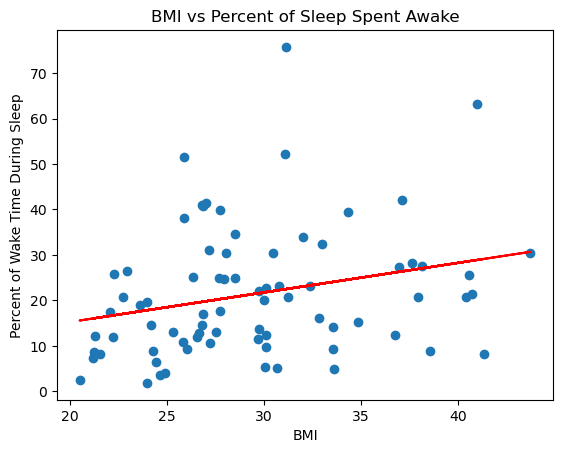

In [11]:
# plots

# BMI vs Percent of Sleep Spent Awake
plt.scatter(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         100*summary_sg1["W"]/summary_sg1["Total_Epoch"])
plt.xlabel("BMI")
plt.ylabel("Percent of Wake Time During Sleep")
plt.title("BMI vs Percent of Sleep Spent Awake")

# line of best fit
a, b = np.polyfit(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         100*summary_sg1["W"]/summary_sg1["Total_Epoch"], 1)

plt.plot(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         a*(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2)) + b,
         color='red')

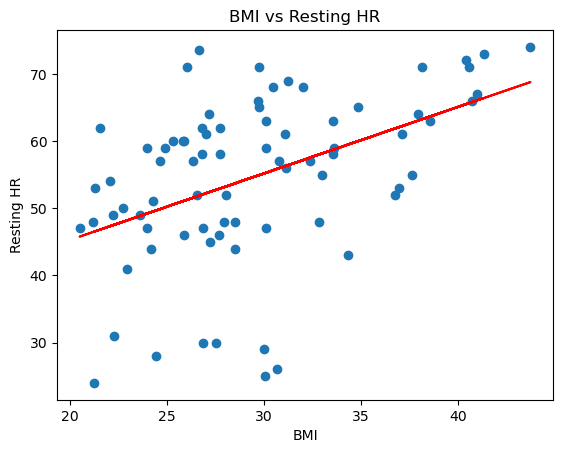

In [12]:
# BMI vs RHR
plt.scatter(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         summary_sg1["Min_HR"])
plt.xlabel("BMI")
plt.ylabel("Resting HR")
plt.title("BMI vs Resting HR")

# line of best fit
a, b = np.polyfit(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         summary_sg1["Min_HR"], 1)

plt.plot(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         a*(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2)) + b,
         color='red')

## How do sleep disorders impact quality and hours of sleep? 

## Conclusion

ToDo: Add conclusion

## References

Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. Computing in science &amp; engineering, 9(3), pp. 

Kluyver, T. et al., 2016. Jupyter Notebooks – a publishing format for reproducible computational workflows. In F. Loizides & B. Schmidt, eds. Positioning and Power in Academic Publishing: Players, Agents and Agendas. pp. 87–90

Khalighi Sirvan, Teresa Sousa, José Moutinho Santos, and Urbano Nunes. “ISRUC-Sleep: A comprehensive public dataset for sleep researchers.“Computer methods and programs in biomedicine 124 (2016): 180-192. Available at: https://sleeptight.isr.uc.pt 